# Thermopower Analysis

## Temperature Variation

Here we work with the variation of temperature in both fridge and high temperature.

Results were generated using "*./thermopower_simulation.py*". Temperature range for high values was set from 50mk to 500mk. For each value of T_high, we simulate with T_fridge from 0.005 to T_high.


In [20]:
# Library import
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Data Import
T_hot = np.arange(0.010,0.5, 0.005)
T_fridge = np.arange(0.005,0.495, 0.005)

df = pd.read_csv("./data/TVar_Thot-0.01-0.495-step0.005_Tcold-0.005-0.49.csv", )
data = df.values

### Fixed T_high

We fix T_high to a certain value and we see how as T_fridge increases, what we observe in the curvature of the L shape mesh.

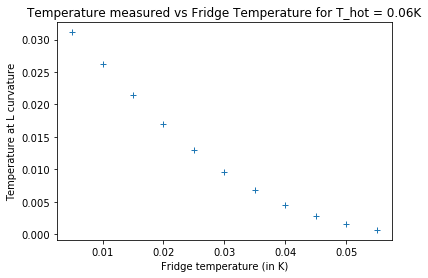

In [44]:
index = 10
T_hot_val = T_hot[index]
T_meas = data[index]


x = []
y = []

for i in range(len(T_meas)):
    if T_meas[i] > 0:
        x.append(T_fridge[i])
        y.append(T_meas[i]-T_fridge[i])
    
        
plt.xlabel("Fridge temperature (in K)")   
plt.ylabel("Temperature at L curvature")
title = "Temperature measured vs Fridge Temperature for T_hot = " + str(T_hot_val) + "K"
plt.title(title)
plt.plot(x, y, "+")
plt.show()

### T_high x T_fridge Space

We now want to see on the whole space how temperature evolves. The following plots the variation of the temperature measured as both T_high and T_fridge vary.

In [67]:
dict_temp = {}
for i in range(len(T_hot)):
    t_data = data[i]
    
    for j in range(len(t_data)):
        if t_data[j] > 0:
            dict_temp[T_hot[i], T_fridge[j]] = t_data[j]-T_fridge[j]
 



keys = dict_temp.keys()
temperature = []; t_hot = []; t_fridge = []
for key in keys:
    temperature.append(float(dict_temp[key]))
    t_hot.append(float(key[0]))
    t_fridge.append(float(key[1]))

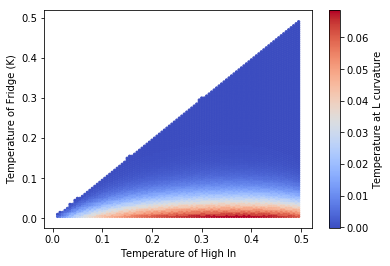

In [75]:
color_by = temperature
label = 'Temperature at L curvature' 
max_color_by = max(color_by)
min_color_by = min(color_by)


fig, ax = plt.subplots()
s = ax.scatter(t_hot, t_fridge,
               c=color_by,
               s=5,
               marker='o',                   # Plot circles
              # alpha = 0.2,
               cmap = plt.cm.coolwarm,       # Color pallete
               vmin = min_color_by,          # Min value
               vmax = max_color_by)          # Max value

cbar = plt.colorbar(mappable = s, ax = ax)   # Mappable 'maps' the values of s to an array of RGB colors defined by a color palette
cbar.set_label(label)
plt.xlabel('Temperature of High In')
plt.ylabel('Temperature of Fridge (K)')
plt.show()